Test1

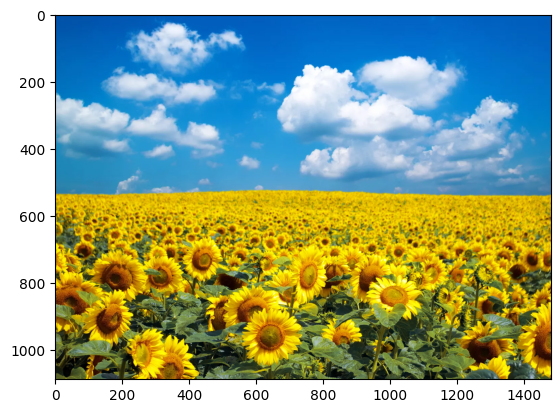

In [114]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# load the image
img = cv2.imread("input.png")

# convert bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(img)
plt.show()

 Analyze the image.

 Create a histogram of the whole image. RGB.

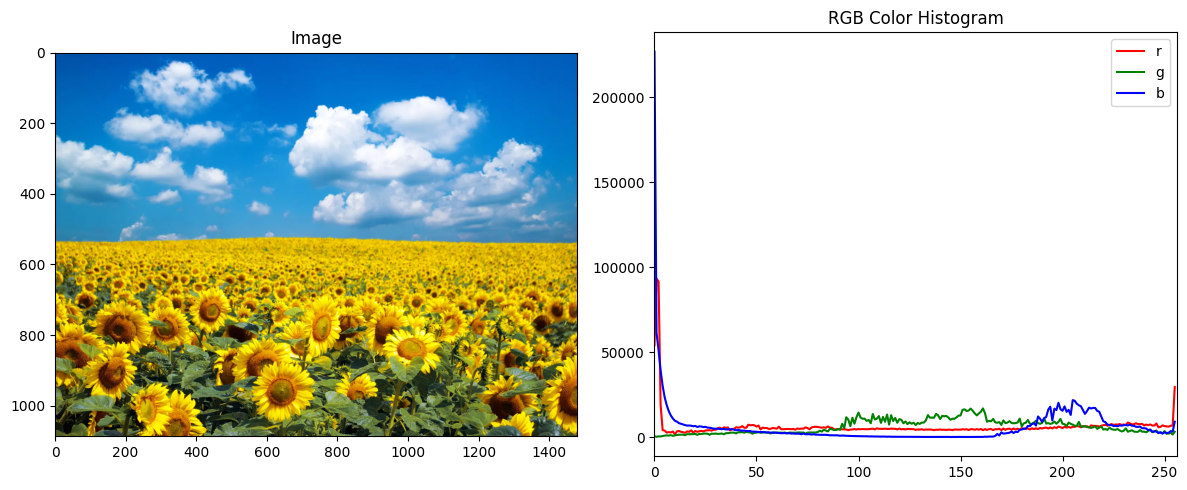

In [115]:
# create histogram for rgb channels
# make the image and histagram next to each other
# Calculate the histogram for each color channel
color = ("r", "g", "b")
histograms = []
for i, j in enumerate(color):
    calc = cv2.calcHist([img], [i], None, [256], [0, 256])
    histograms.append(calc)

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# First subplot for the image
plt.subplot(121)
plt.imshow(img)
plt.title("Image")

# Second subplot for the histogram
plt.subplot(122)
for i, j in enumerate(color):
    plt.plot(histograms[i], color=j, label=j)
plt.xlim([0, 256])
plt.title("RGB Color Histogram")
plt.legend()

# Display the figure
plt.tight_layout()  # for spacing
plt.show()

Modify your image with brightness and contrast (completes total range)

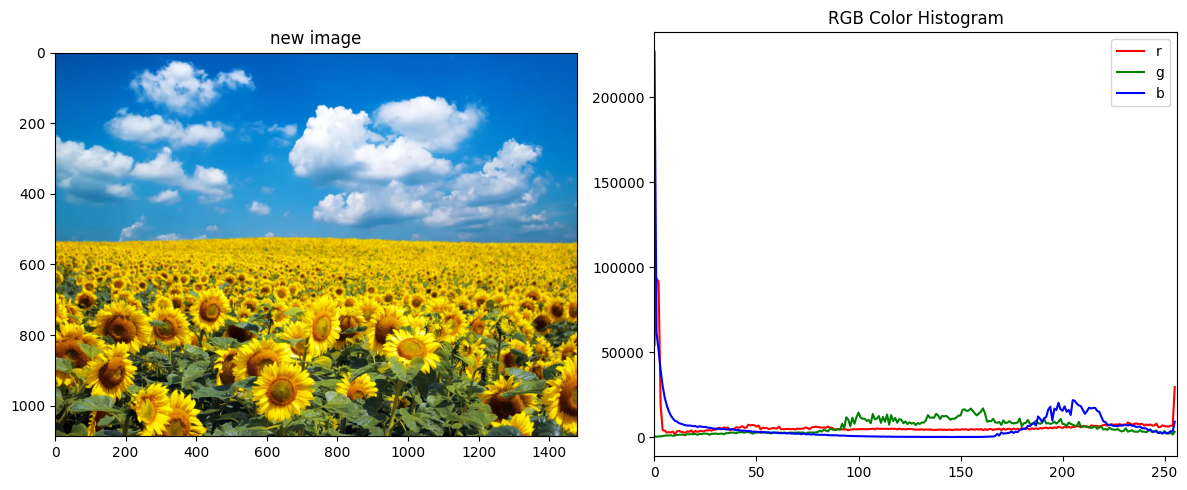

In [116]:
# alpha = 1.05  # contrast
# beta = 7  # brightness

#image is allready bright enough and completes the whole rgb range.

# new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
new_image = img


histograms = []
for i, j in enumerate(color):
    calc = cv2.calcHist([new_image], [i], None, [256], [0, 256])
    histograms.append(calc)

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# First subplot for the image
plt.subplot(121)
plt.imshow(new_image)
plt.title("new image")

# Second subplot for the histogram
plt.subplot(122)
for i, j in enumerate(color):
    plt.plot(histograms[i], color=j, label=j)
plt.xlim([0, 256])
plt.title("RGB Color Histogram")
plt.legend()

# Display the figure
plt.tight_layout()  # for spacing
plt.show()

Mask out bottom half of image


(1087, 1480, 3)


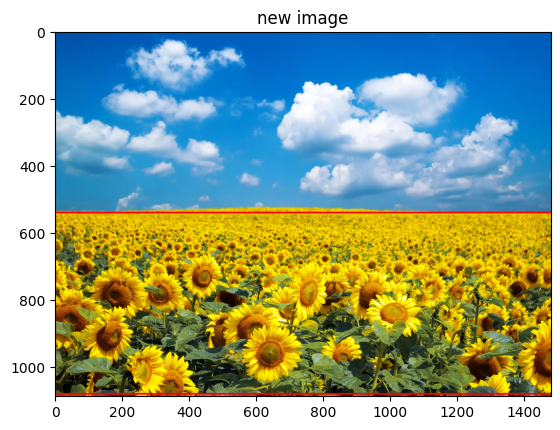

In [117]:
#create a rectangle

top_left = (0, 540)

bottom_right = (1480, 1080)

color = (255, 0, 0)

thickness = 3

img_rect = None

img_rect = cv2.rectangle(new_image, top_left, bottom_right, color, thickness)

print (img_rect.shape)

plt.imshow(img_rect)
plt.title("new image")
plt.show()

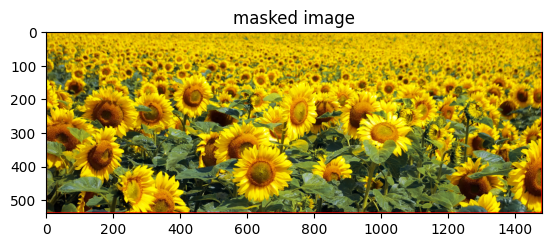

In [118]:
img_masked = new_image[540:1080, 0:1480]

plt.imshow(img_masked)
plt.title("masked image")
plt.show()

Use the mask to create a HSV histogram.


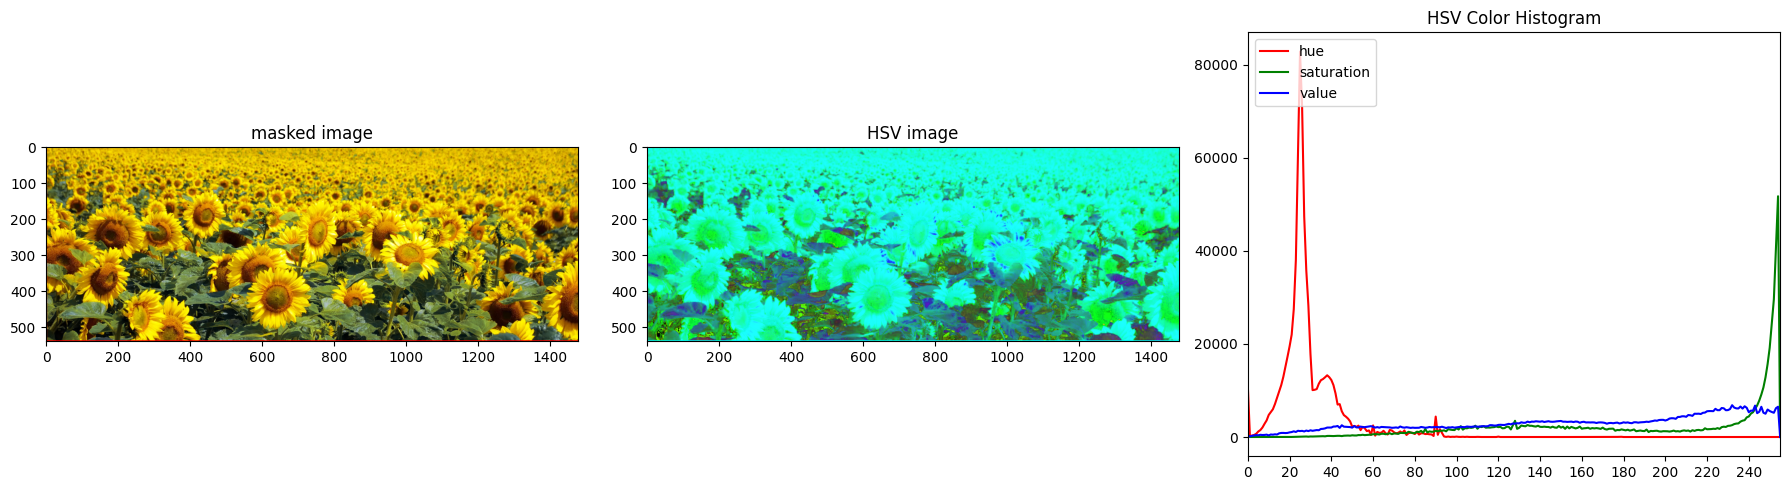

In [119]:
# maked image hsv histogram

# convert rgb to hsv

img_hsv = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)

# create histogram for hsv channels

# I couldnt figure out how to loop through the channels so I did it manually


# # Create a figure with three subplots side by side
plt.figure(figsize=(18, 5))

# First subplot for the image
plt.subplot(131)
plt.imshow(img_masked)
plt.title("masked image")

# Second subplot for the hsv image
plt.subplot(132)
plt.imshow(img_hsv)
plt.title("HSV image")

# third subplot for the histogram
plt.subplot(133)

# Hue
hist = cv2.calcHist([img_hsv], [0], None, [256], [0, 255])
# Add histogram to the plot.
plt.plot(hist, color="red")
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0, 255])
# Saturation
hist = cv2.calcHist([img_hsv], [1], None, [256], [0, 255])
# Add histogram to the plot.
plt.plot(hist, color="green")
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0, 255])
# Value
hist = cv2.calcHist([img_hsv], [2], None, [256], [0, 255])
# Add histogram to the plot.
plt.plot(hist, color="blue")
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0, 255])
# Add a legend
plt.legend(("hue", "saturation", "value"), loc="upper left")
# ad title
plt.title("HSV Color Histogram")

plt.xticks(range(0, 256, 20))


# Display the figure
plt.tight_layout()  # for spacing
plt.show()

Analyze the histogram.

Use the HSV ranges to create a mask.


In [120]:
# load the image
img = cv2.imread("Input.png")

# convert bgr to hsv
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# ranges
lower = np.array([0, 0, 0], dtype=np.uint8)
upper = np.array([30, 255, 255], dtype=np.uint8)

# create mask

mask = cv2.inRange(img, lower, upper)


Apply the mask to the image and segment out the background.


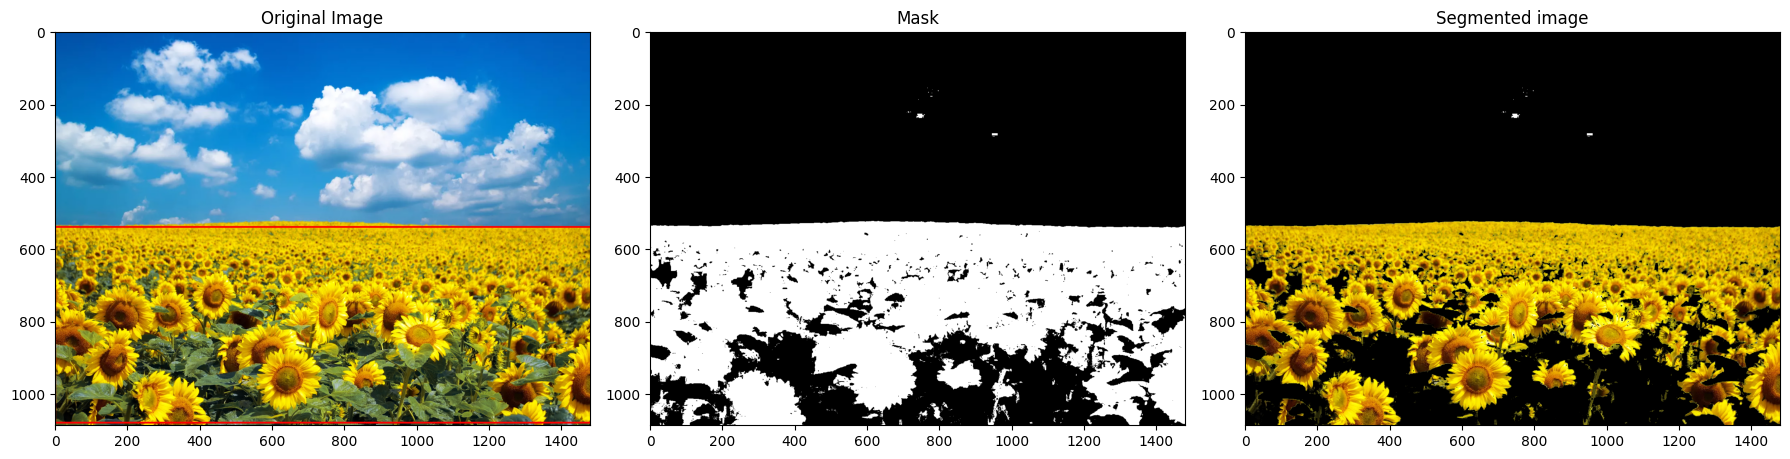

In [121]:
# # Create a figure with three subplots side by side
plt.figure(figsize=(18, 5))

# Display the original image
plt.subplot(131)
plt.imshow(new_image)
plt.title("Original Image")

# Display the mask as an image
plt.subplot(132)
plt.imshow(mask, cmap="gray")
plt.title("Mask")


# Apply the mask to the image
img_skin = cv2.bitwise_and(img, img, mask=mask)

img_skin = cv2.cvtColor(img_skin, cv2.COLOR_HSV2RGB)

# Display the segmented image
plt.subplot(133)
plt.imshow(img_skin)  # Convert to RGB format
plt.title("Segmented image")

plt.tight_layout()  # for spacing
plt.show()